# Random Forest on the Titanic Dataset

In [1]:
# import packages 
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = df.drop('Cabin', axis=1)

In [5]:
df = df.dropna()

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
le.fit_transform
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,1
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [9]:
df = df.drop(['Ticket', 'PassengerId'], axis=1)

In [10]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,29.1250,1
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


## Split data into X and y

Now that the data is clean, I will split the data into X and y.

In [11]:
X = df.loc[:,['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked'] ]
y = df.loc[:, ['Survived']]

I also will be splitting data into train and test sets.

In [12]:
# X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

I will now make a Decision tree as the base model and using Bagging technique to make an ensemble prediction.

In [13]:
# Create base model 
base = DecisionTreeClassifier(max_depth=5)
ensemble = BaggingClassifier(base_estimator=base, n_estimators=100, random_state=7)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.7762237762237763
Accuracy ensemble: 0.8041958041958042


/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


I will also use Adaboost to make an ensemble prediction.

In [14]:
#Ada boost
base = DecisionTreeClassifier(max_depth = 5)
adab = AdaBoostClassifier(base_estimator = base, n_estimators = 100)

base.fit(X_train, y_train)
adab.fit(X_train, y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy adab:",adab.score(X_test, y_test))

Accuracy base: 0.7902097902097902
Accuracy adab: 0.8041958041958042


/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


I was curious to see which are the most important features for this model. Using feature_importances_ can help me with that.

In [15]:
forest = RandomForestClassifier(n_estimators=100, random_state=7)
forest.fit(X_train, y_train)

feature_imp = pd.DataFrame(forest.feature_importances_, columns = ['importance'], index = X_train.columns).sort_values(by = 'importance', ascending=False)
feature_imp

/var/folders/pm/w5w2y4_s0ln4p5gqdsgrgrqr0000gn/T/ipykernel_1518/848720672.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


,importance
Age,0.278734
Fare,0.265859
Sex,0.248306
Pclass,0.088690
SibSp,0.048915
Parch,0.037748
Embarked,0.031747


From this table, it seems that Age is the most important feature, with importance of 28%

In [16]:
#tuning the parameters
#use the bagging method
base = DecisionTreeClassifier(max_depth=8) # Create base model
ensemble = BaggingClassifier(base_estimator=base, n_estimators=300, random_state=7)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy base: 0.7902097902097902
Accuracy ensemble: 0.8391608391608392


In [17]:
unpruned_tree = DecisionTreeClassifier(max_depth = None)
unpruned_tree.fit(X_train, y_train) 
print(f'Performance of the unpruned tree is {unpruned_tree.score(X_test, y_test)}')
print(f'The depth is {unpruned_tree.tree_.max_depth}')

Performance of the unpruned tree is 0.7832167832167832
The depth is 22


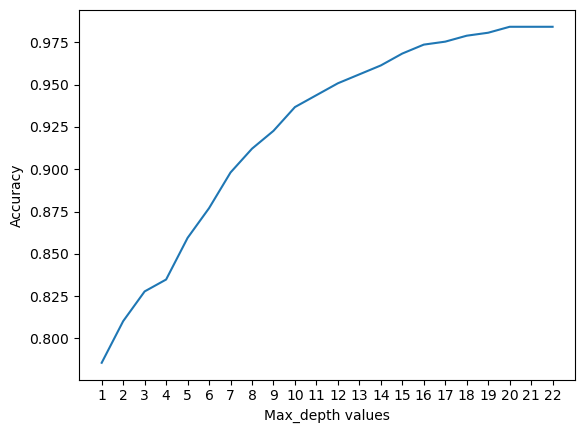

In [18]:
#finding the optimal max_depth
pruned_depths = range(1,unpruned_tree.tree_.max_depth+1)

pruned_scores_train = [] 

for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    pruned_scores_train.append(score)

    
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores_train) #blue
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [19]:
import numpy as np
best_depth_train = pruned_depths[np.argmax(pruned_scores_train)]
print('Best performance of train set reached at depth of:', best_depth_train)
#Optimal max_depth is at 20

Best performance of train set reached at depth of: 20


In [26]:
base = DecisionTreeClassifier(max_depth=20)
ensemble = BaggingClassifier(base_estimator=base, n_estimators=300, random_state=7)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy base: 0.8111888111888111
Accuracy ensemble: 0.8531468531468531


In [27]:
#Find the optimal n_estimator
my_list = []

for i in range(1, 1001,100):
    my_list.append(i)
    
print(my_list)

[1, 101, 201, 301, 401, 501, 601, 701, 801, 901]


In [28]:
n_estimators = my_list


n_estimator_train = [] 

for d in n_estimators:
    clf = DecisionTreeClassifier(max_depth = 20) #use the best max_depth
    ensemble = BaggingClassifier(base_estimator=clf, n_estimators=d, random_state=7)
    clf.fit(X_train, y_train)
    ensemble.fit(X_train, y_train)
    score = ensemble.score(X_train, y_train)
    n_estimator_train.append(score)


print('')
print('Bagging results')
data = {'n_estimator': [1, 101, 201, 301, 401, 501, 601, 701, 801, 901], 'Accuracy': [0.9191564147627417, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588]}
pd.DataFrame(data)


/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConve


Bagging results


,n_estimator,Accuracy
0,1,0.919156
1,101,0.991213
2,201,0.991213
3,301,0.991213
4,401,0.991213
5,501,0.991213
6,601,0.991213
7,701,0.991213
8,801,0.991213
9,901,0.991213


Bagging: It seems that after n_estimator = 100, the accuracy stays the same. Therefore, the optimal n_estimator = 100 (for bagging method).

In [29]:
n_estimators = my_list


n_estimator_train = [] 

for d in n_estimators:
    clf = DecisionTreeClassifier(max_depth = 20) #use the best max_depth
    ensemble = AdaBoostClassifier(base_estimator=clf, n_estimators=d, random_state=7)
    clf.fit(X_train, y_train)
    ensemble.fit(X_train, y_train)
    score = ensemble.score(X_train, y_train)
    n_estimator_train.append(score)

print('')
print('Boosting results')
data = {'n_estimator': [1, 101, 201, 301, 401, 501, 601, 701, 801, 901], 'Accuracy': [0.9191564147627417, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588, 0.9912126537785588]}
pd.DataFrame(data)

/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConve


Boosting results


,n_estimator,Accuracy
0,1,0.919156
1,101,0.991213
2,201,0.991213
3,301,0.991213
4,401,0.991213
5,501,0.991213
6,601,0.991213
7,701,0.991213
8,801,0.991213
9,901,0.991213


It seems that for Boosting, the best n_estimator is also 100.

It seems that both bagging and boosting give identical results, the optimal n_estimator is 100 for both. Therefore, we can use max_depth = 18 and n_estimator =100 for our test sets.

Bagging

In [30]:

base = DecisionTreeClassifier(max_depth=20)
ensemble = BaggingClassifier(base_estimator=base, n_estimators=100, random_state=7)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.7832167832167832
Accuracy ensemble: 0.8461538461538461


/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Boosting

In [31]:
#Ada boost
base = DecisionTreeClassifier(max_depth = 20)
adab = AdaBoostClassifier(base_estimator = base, n_estimators = 100)

base.fit(X_train, y_train)
adab.fit(X_train, y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy adab:",adab.score(X_test, y_test))

Accuracy base: 0.7762237762237763
Accuracy adab: 0.8111888111888111


/Users/elisha-fred/miniforge3/envs/base_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging and Boosting give similar results, with Bagging giving only slightly higher accuracy than bagging.